# Investigating Movies dataset 
I am going to clean and explore this dataset in order to answer some questions:
What are the top 5 movies with the highest revenue?
What is the most popular genre type of all movies?
Who are the top three directors who produced the movies with the highest revenue?
What are the top 5 popular movies in the 20th century ?
What are the top 5 movies that made no profit?
I am going to answer these questions by carefully analyzing the data and looking for patterns then coming up with a good conclusion. 
This dataset contains about 1992 movies after the data has been well-cleaned to ensure consistancy.

In [2]:
#importing liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Wrangling

In [3]:
df = pd.read_csv('tmdb-movies.csv') #reading the data

In [8]:
df.shape[0] #finding out the number of movies

1992

In [6]:
df.head(1) # genral look at the data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [9]:
df.isna().any() #looking for missing values

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

The dataset does have some missing values

In [10]:
df.describe() #general look at the statistics of the data

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning

In [4]:
# cleaning the data
df.dropna(inplace = True) #removing missing values
df.drop_duplicates(inplace = True) #removing duplicated values

In [5]:
#dropping not needed columns
df.drop(labels = ['id','imdb_id','homepage','tagline','overview'],axis = 1 ,inplace = True)

## Exploration of the data

### What are the top 5 movies with the highest revenue?

<ipython-input-80-9c05266e902e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_rev_movies.sort_values(by = ['revenue'], ascending = False,inplace = True) #sorting the values by revenue column


<AxesSubplot:ylabel='revenue'>

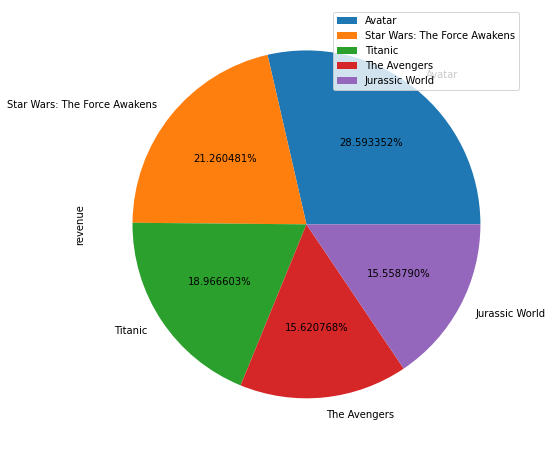

In [80]:
# highest revenue movies
mean_rev = df.revenue.mean() #getting the mean value of the revenues
highest_rev_movies= df[df['revenue']> mean_rev] #getting the values higher than the mean
highest_rev_movies.sort_values(by = ['revenue'], ascending = False,inplace = True) #sorting the values by revenue column
highest_rev_movies.head().plot(figsize =(8,8),kind = 'pie',y ='revenue',labels = highest_rev_movies.original_title.head(),autopct="%1f%%")

### What are most popular genre types ?

In [78]:
# finding the most popular genre types
def sep_counter(column):
    '''Seperates genre types in the gneres column by "|" '''
    split_data = pd.Series(df[column].str.cat(sep = '|').split('|'))
    
    count_data = split_data.value_counts(ascending=False) # gets the count of the genres and sorting them
    return count_data

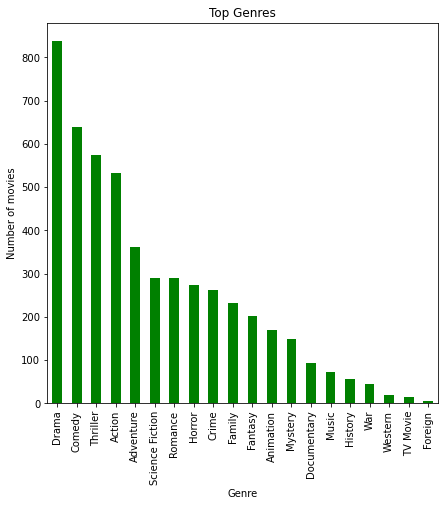

In [79]:
sep_counter("genres").plot(kind="bar",figsize=(7,7),color = 'Green') #visualising the counts of the genres
plt.title("Top Genres");
plt.xlabel('Genre');
plt.ylabel('Number of movies');

### What are the top 5 popular movies in the 20th century ?

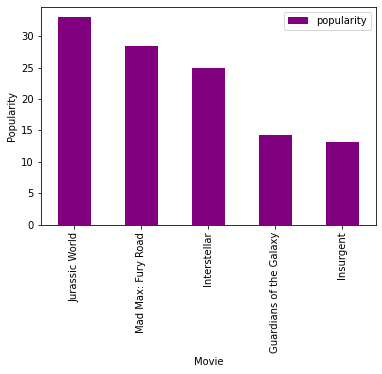

In [61]:
# top 5 popular movies in 20th century
pop_20th  = df.query('release_year > 2000') # getting movies that were released after 2000
pop_20th_sorted = pop_20th.sort_values(by = ['popularity'],ascending = False) #sorting the movies by popularity
pop_20th_sorted.head(5).plot(kind = 'bar', x = 'original_title', y='popularity',color = 'Purple'); # creating a bar chart to visualize the foundings
plt.xlabel('Movie');
plt.ylabel('Popularity');
plt.legend();

### Who are the top three directors who produced the movies with the highest revenue?

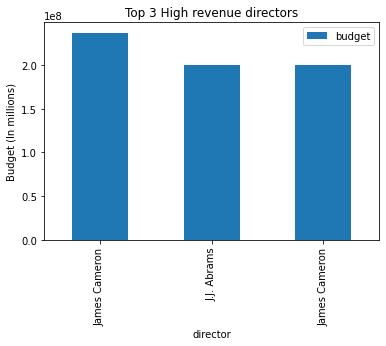

In [139]:
# most popular movie for the director with highest revenue
richest_directors = highest_rev_movies.director.head(4).tolist()     #creates a list of top 3 richest directors
for director in richest_directors:                                   #removing duplicated directors
    count = richest_directors.count(director)
    if count >1:
        richest_directors.remove(director)
    
movies= df.query('director in @richest_directors').sort_values(by = ['revenue'],ascending = False)# getting the movies of directors
movies.drop([5231],axis =0)          #cleaning additional rows that belong to the same directos (for visualization purpose only)
movies.head(3).plot(kind ='bar',x='director',y = 'budget');
plt.ylabel('Budget (In millions)');
plt.title('Top 3 High revenue directors');


## Most popular movies for top 3 directors with the higest revenue

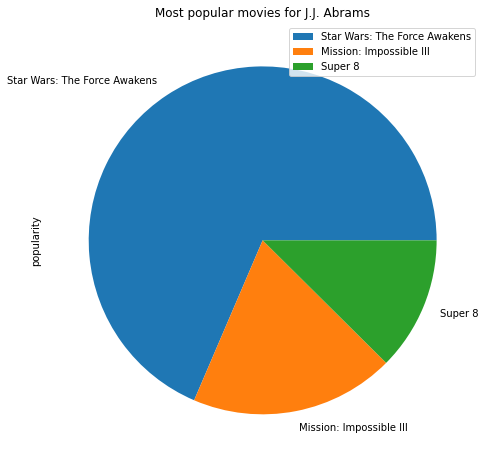

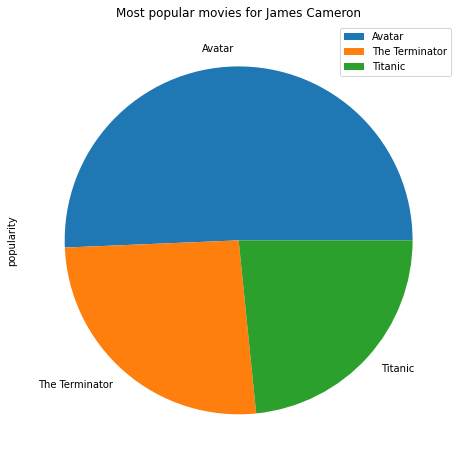

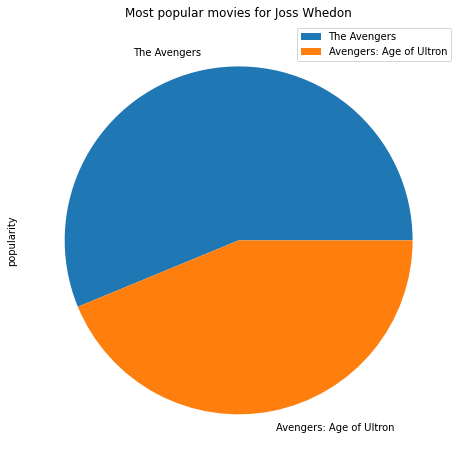

In [150]:
for director in richest_directors:          # a loop to create a single plot for each director
    director_movies = df.query('director ==@director').sort_values(by=['popularity'],ascending = False) # Getting the movies of these directors
    director_movies.head(3).plot(figsize = (8,8),kind = 'pie',y = 'popularity', labels = director_movies.original_title) #plotting their most popular movies
    plt.title('Most popular movies for {}'.format(director))

### What are the top 5 movies that made no profit?

<ipython-input-102-45416facaca0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_zero_budget_df['profit'] = no_zero_budget_df['revenue']- no_zero_budget_df['budget'] #calculating profit
<ipython-input-102-45416facaca0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_zero_budget_df.sort_values(by = ["profit"], inplace = True) # sorint by profit


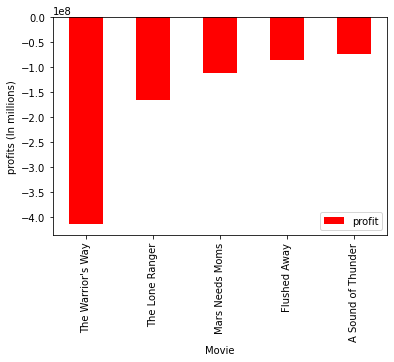

In [102]:
# finding movies which didn't make money
no_zero_budget_df = df.query('budget !=0' and 'revenue != 0') # not including missing values from budget and revenue
no_zero_budget_df['profit'] = no_zero_budget_df['revenue']- no_zero_budget_df['budget'] #calculating profit
no_zero_budget_df.sort_values(by = ["profit"], inplace = True) # sorint by profit
no_profit = no_zero_budget_df.query('profit < 0') #getting negative values
big_profit = no_zero_budget_df.query('profit > 0') #getting positive values
no_profit.head().plot(kind = 'bar',x='original_title',y='profit',color='Red');
plt.xlabel('Movie');
plt.ylabel('profits (In millions)');


## Graphical representation of the data

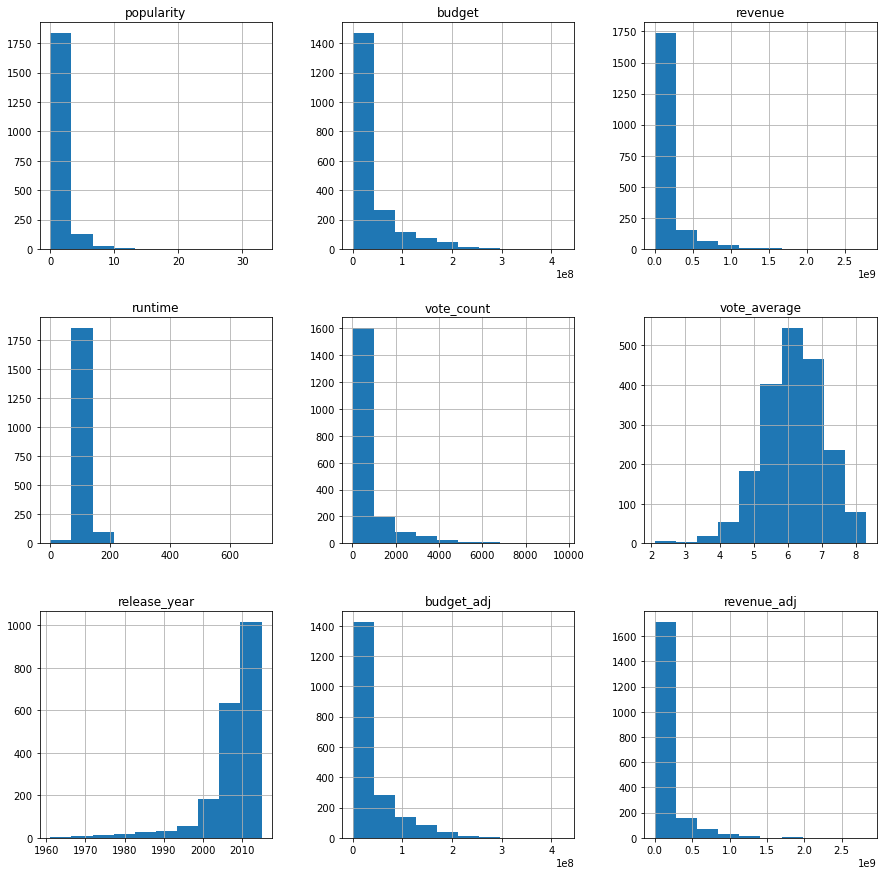

In [12]:
# general look at the graphs of the data
df.hist(figsize = (15,15));

As we can see, It is clear that the production of movies increased dramatically in the last two decades and about 90% of the movies fall between the runtime of about 90 and 150 minutes

## Comparison between successful movies and unsuccessful ones

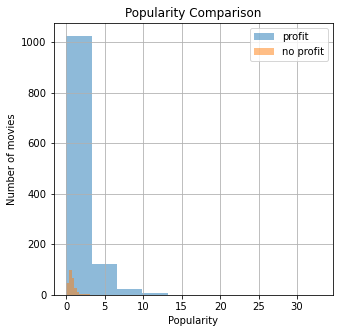

In [24]:
# Comparing the popularity of the movies
plt.figure(figsize = (5,5));
big_profit.popularity.hist(alpha =0.5 ,label ="profit");
no_profit.popularity.hist(alpha = 0.5,label= 'no profit');
plt.xlabel('Popularity')
plt.ylabel('Number of movies')
plt.title('Popularity Comparison');
plt.legend();

By taking a look at the gragh here, we start to realize how differecnt successful movies(A) were, compared to their counter ones(B):
The popularity of (A) ranges from 1 to 14 with a significant amount of them ranging from 4 to 7, meanwhile (B) ranges from 0 to 3 with the majority of them below 1.


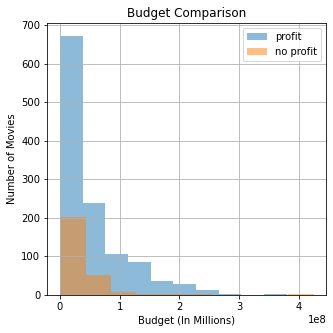

In [23]:
# Comparing the budget of the movies
plt.figure(figsize = (5,5));
big_profit.budget.hist(alpha =0.5 ,label ="profit");
no_profit.budget.hist(alpha = 0.5,label= 'no profit');
plt.xlabel("Budget (In Millions)")
plt.ylabel('Number of Movies')
plt.title('Budget Comparison');
plt.legend();

We can see that generally speaking successful movies tend to have higher budgets.

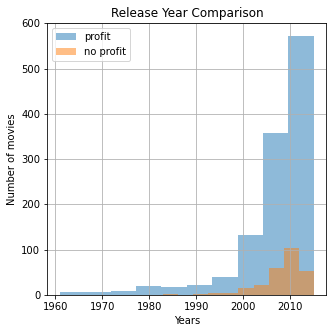

In [17]:
# Comparing the year the movie was released
plt.figure(figsize = (5,5));
big_profit.release_year.hist(alpha =0.5 ,label ="profit");
no_profit.release_year.hist(alpha = 0.5,label= 'no profit');
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.title('Release Year Comparison');
plt.legend();

We can conclude that movies released in the last century have higher chances of being successful than movies of the current century

110.59864521591871 105.29056603773584


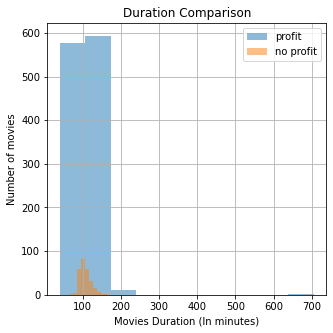

In [26]:
# Comparing runtime 
plt.figure(figsize = (5,5));
big_profit.runtime.hist(alpha =0.5 ,label ="profit");
no_profit.runtime.hist(alpha = 0.5,label= 'no profit');
plt.title('Duration Comparison');
plt.xlabel("Movies Duration (In minutes)")
plt.ylabel("Number of movies")
plt.legend();
print(big_profit.runtime.mean(),no_profit.runtime.mean())


Apparently, the duration of the movie doesn't play a major role in determining the success of it

### Limitations
No exploration done on cast and keywords.
There is no statistical inference performed in this analysis.
Too many cleaned data (less accuracy due to the huge reduction of the amount of the data for the sake of cleaning).
The approach taken to the dataset is considered shallow with no deep investigation performed.

## Conclusions

> We can see that there has been an increase in the productin of movies in recent years.
> Unlike movies from this century, the majory of the movies from last century were successful.
> A good marketing of the movie plays a huge role in the success of the movie (according to the popularity of the movies).
> The most popular movie of all time is Jurrassic world.
> Movies with the genre of drama have a high share of the genres of all movies.
> James Cameron is the director of the movie with the highest revenue.

